---

**<font color="green">Комментарий ревьюера V3</font>**

Привет еще раз!


---


---

**<font color="green">Комментарий ревьюера V2</font>**

Привет! Спасибо за доработку задания


---


---

**<font color="green">Комментарий ревьюера</font>**

Привет! Спасибо тебе за выполненное задание!
Меня зовут Горленко Екатерина, я буду проверять твою работу. Со мной можно на “ты” :)

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии. Будет здорово, если для своих ответов ты тоже выберешь какой-то **<font color="blue">заметный цвет</font>**  или **формат**, так мне будет легче отследить изменения.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---


### Шаг 1. Загружаем данные и подготавливаем их к анализу

---


<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера


Я заметила, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук (Kernel -> Restart & Run All), чтобы убедиться, что все ячейки выполняются корректно
    
P.S. К сожалению так и получилось, код не отработал, посмотри в чем там дело и возвращайся
    
---
    
Кстати, в работе довольно подробные выводы, но совсем нет преамбулы. Что это за проект, о чем, для чего, какие шаги проделаны? В начале работы всегда важно отметить цель - основной вопрос, на который ты даешь ответ своим исследованием. Чем твоя работа полезна получателю, на какой бизнес вопрос она ответит.
    

</div>
    	
---


<div style="background-color:#d4d7d9">
    <p> 
        <strong style="color:#0015f0; font-size: 13pt"> Комментарии хозяина тетрадки:</strong>
    </p>
    <p style="background-color:#d4d7d9; color:#0015f0"> Спасибо за комментарии. Внес правки, сейчас все должно работать + добавил описательную часть в проект </p>
</div>

<strong style="font-size: 13pt">Описание проекта: </strong>
<p> В распоряжение получены логи проекта Яндекс Афиша в виде визитов, заказов и маркетиговых затрат.</p>

<strong style="font-size: 13pt">Задача: </strong>
<p> Провести анализ пользовательской активности на сайте и проверить рекламные источники на момент стоимостных характеристик</p>

<strong style="font-size: 13pt">Цель: </strong>
<p> Оптимизировать маркетинговые затраты и увеличить прибыль проекта </p>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Отлично, спасибо за дополнения

</div>

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
marketing = pd.read_csv('/datasets/costs.csv')

Проверяем типы данных и отсутствующие значения:

In [2]:
visits.info()
print('\n')
orders.info()
print('\n')
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Во всех таблицах наблюдается неверный тип данных у колонок время. Меняем на корректное

In [3]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')
marketing['dt'] = marketing['dt'].astype('datetime64')

Переименуем названия столбцов для удобства:

In [4]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Тут все хорошо, можно было сделать краткие выводы по проделанной предобработке. Двигаемся дальше )
</div>

---


### Шаг 2. Строим отчеты и считаем метрики

##### Рассмотрим данные, связанные с продуктом:
Сперва подготовим данные  и создадим дополнительные колонки для получения итоговых данных

In [5]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.year

<em style="color:#0015f0"> Посчитаем количество уникальных пользователей за день / неделю / месяц:</m>

In [6]:
dau_total = visits.groupby(['session_date']).agg({'uid':'nunique'}).mean().astype('int')
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean().astype('int')
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean().astype('int')

print('Количество уникальных пользователей в день: {}'.format(dau_total['uid']))
print('Количество уникальных пользователей в неделю: {}'.format(wau_total['uid']))
print('Количество уникальных пользователей в месяц: {}'.format(mau_total['uid']))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


Рассмотрим эти же данные в разрезе устройств:

In [7]:
dau_desktop = visits[visits['device'] == 'desktop'].groupby(['session_date']).agg({'uid':'nunique'}).mean().astype('int')
dau_touch = visits[visits['device'] == 'touch'].groupby(['session_date']).agg({'uid':'nunique'}).mean().astype('int')

wau_desktop = visits[visits['device'] == 'desktop'].groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean().astype('int')
wau_touch = visits[visits['device'] == 'touch'].groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean().astype('int')

mau_desktop = visits[visits['device'] == 'desktop'].groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean().astype('int')
mau_touch = visits[visits['device'] == 'touch'].groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean().astype('int')

print('Количество уникальных пользователей в день в рамках desktop устройств: {}'.format(dau_desktop['uid']))
print('Количество уникальных пользователей в день в рамках mobile устройств: {}'.format(dau_touch['uid']))
print('\nКоличество уникальных пользователей в неделю в рамках desktop устройств: {}'.format(wau_desktop['uid']))
print('Количество уникальных пользователей в неделю в рамках mobile устройств: {}'.format(wau_touch['uid']))
print('\nКоличество уникальных пользователей в месяц в рамках desktop устройств: {}'.format(mau_desktop['uid']))
print('Количество уникальных пользователей в месяц в рамках mobile устройств: {}'.format(mau_touch['uid']))

Количество уникальных пользователей в день в рамках desktop устройств: 659
Количество уникальных пользователей в день в рамках mobile устройств: 252

Количество уникальных пользователей в неделю в рамках desktop устройств: 4129
Количество уникальных пользователей в неделю в рамках mobile устройств: 1634

Количество уникальных пользователей в месяц в рамках desktop устройств: 16724
Количество уникальных пользователей в месяц в рамках mobile устройств: 6825


В рамках источника трафика пользователи в динамике по месяцам:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'USERS. SOURCE OF TRAFFIC MONTH TO MONTH')

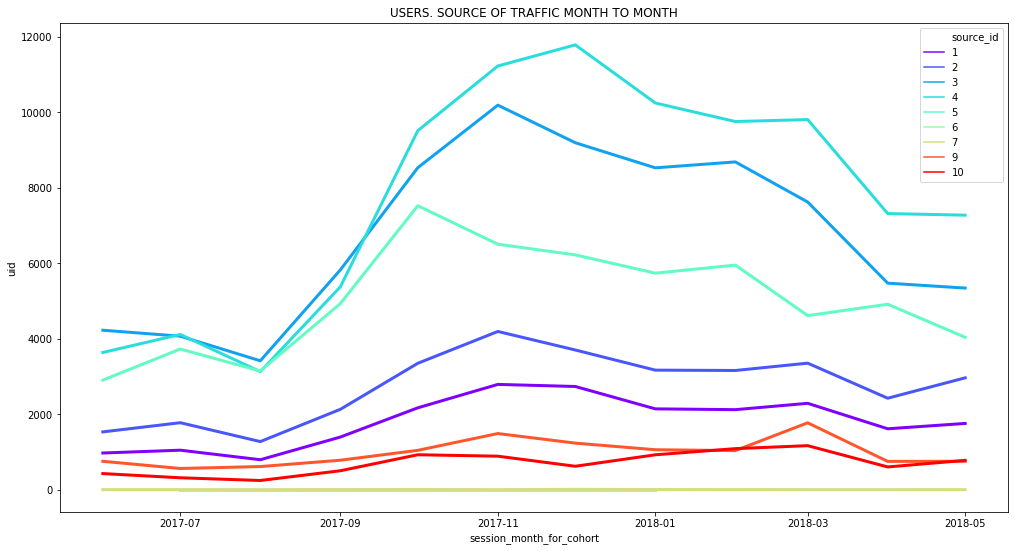

In [8]:
visits['session_month_for_cohort'] = visits['session_date'].astype('datetime64[M]')
traffic_source_time = visits.groupby(['source_id', 'session_month_for_cohort']).agg({'uid':'nunique'}).reset_index()

fig, ax = plt.subplots(figsize=(17,9))
sns.lineplot(x='session_month_for_cohort', y='uid', hue='source_id', legend='full',  data=traffic_source_time, palette="rainbow", 
             linewidth=3).set_title('USERS. SOURCE OF TRAFFIC MONTH TO MONTH')

Наибольшее количества уникальных пользователей приходит с источников под номерами №4, №3, №5.

Активный период набора пользователей: с октября 2017 по март 2018.

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Верные расчеты и наглядная визуализация. Отлично что отметил сезонность
</div>

---


<em style="color:#0015f0"> Узнаем количество сессий в день и их динамику:</m>

Количество сессий в день: 987
Среднее количество сессий на пользователя: 1.09


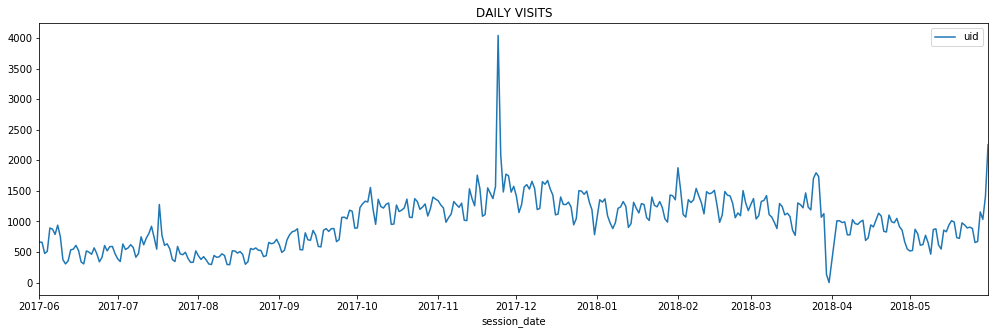

In [9]:
sessions_per_day_mean = visits.groupby(['session_date']).agg({'uid':'count'}).mean().astype('int')

print('Количество сессий в день: {}'.format(sessions_per_day_mean.loc['uid']))
print('Среднее количество сессий на пользователя: {:.2f}'.format(sessions_per_day_mean.loc['uid'] / dau_total.loc['uid']))

#Динамика сессий по дням
sessions_per_day = visits.groupby(['session_date']).agg({'uid':'count'})
sessions_per_day.plot(y='uid', figsize=(17,5), linestyle='solid', title='DAILY VISITS')

Графику присуще волнообразное формирование в связи с прилывом трафика в будние дни и обратным течением в выходные.
Налюдаются локальные месячные пики по каждому месяцу.

Из аномалий стоит отметить:
- резкий скачек трафика 24.11.2017 (x2 трафика по сравнению с наибольее активным днем в представленном в датасете периоде)
- резкий скачек трафика на конец рассматриваемого периода 31.5.2018
- резкое падение трафика 30.03.2017 (возможно перебои с работой сайта)

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Мне нравится как ты внимательно изучаешь данные и отмечаешь аномалии. Важный навык для аналитика.
</div>

---


<em style="color:#0015f0"> Узнаем сколько длится одна сессия и ее динамику:<m>

0    60
dtype: int64


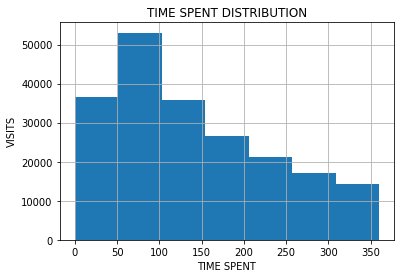

In [10]:
visits['time_spent_per_session'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

plt.title('TIME SPENT DISTRIBUTION')
plt.xlabel('TIME SPENT')
plt.ylabel('VISITS')
visits['time_spent_per_session'].hist(bins=7, range=(0,360))


print(visits['time_spent_per_session'].mode())

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Нужно подправить график: он должен содержать заголовок и подписи к осям. 
    
И заодно проверь остальные графики - это общее требование
</div>

---



<div style="background-color:#d4d7d9">
    <p> 
        <strong style="color:#0015f0; font-size: 13pt"> Комментарии хозяина тетрадки:</strong>
    </p>
    <p style="background-color:#d4d7d9; color:#0015f0"> Спасибо за комментарии. Внес правки</p>
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V3

Отлично, принимается)

</div>

---


Наиболее часто встречающееся время сесси на сайте - 1 мин.

---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Верный комментарий про моду - этот параметр в данном случае подходит лучше всего

</div>
    
---


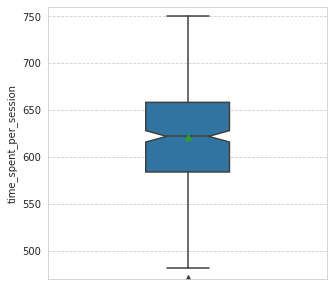

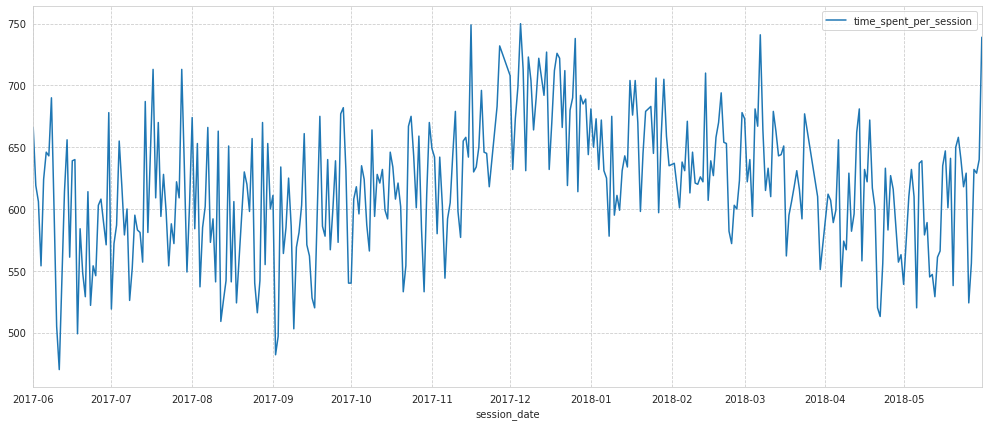

In [11]:
time_spent_dynamic = visits.groupby('session_date').agg({'time_spent_per_session':'sum'})
time_spent_dynamic = time_spent_dynamic.join(sessions_per_day, on='session_date')
time_spent_dynamic.columns = ['total_time_spent', 'users']
time_spent_dynamic['time_spent_per_session'] = (time_spent_dynamic['total_time_spent'] / time_spent_dynamic['users']).astype('int')

# Убираем выбросы
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y='time_spent_per_session', data=time_spent_dynamic, width=0.3, showmeans=True, notch=True)
plt.ylim(470,760)

# Строим график по дням
time_spent_dynamic[(time_spent_dynamic['time_spent_per_session'] >= 470) & (time_spent_dynamic['time_spent_per_session'] <= 760)].plot(y='time_spent_per_session', figsize=(17,7))

Распределение среднего времени идет уже несколько иначе, нежели будни-выходные и имеет сильные локальные недельные пики.
Среднее время наиболее низки в летний и предлетний период: апрель - сентябрь.
Наиболее высокое времяпрепровождение зимой: ноябрь - март

<em style="color:#0015f0"> Посчитаем, как часто люди возвращаются </em>

Формируем когорты и на их основе рассчитываем Retention Rate

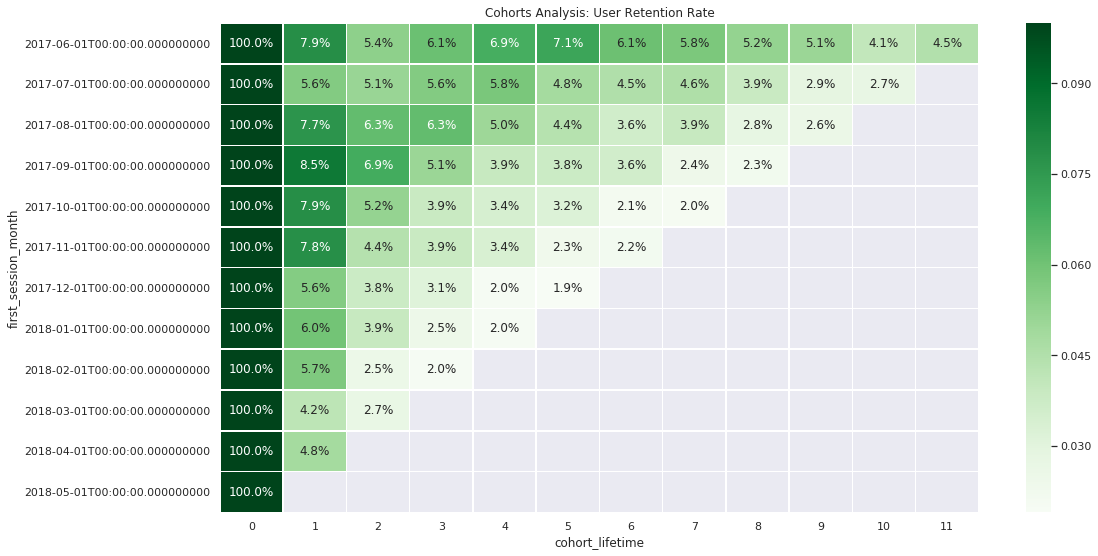

In [12]:
# Определяем первую сессию
first_session = visits.groupby('uid')['session_date'].min()

# Добавим в таблицу данные по времени первой сессии
first_session.name = 'first_session_date'
visits = visits.join(first_session,on='uid')

# Выделяем месяц из первой сессии пользователя
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')

# Готовим данные по череде месяцев для каждого пользователя
visits['cohort_lifetime'] = ((visits['session_month_for_cohort'] - visits['first_session_month']) / np.timedelta64(1,'M')).round(0).astype('int') # Округляем до целого числа, т.к. перевод значений в 'int' дает некорректное округление и отсутсвуют данные по некоторым lifetime месяцам

# Создаем когортную таблицу в абсолютных числах
cohorts = visits.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# Находим количество пользователей в нулевой когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

# Добавляем количество пользователей на нулевой период в когортную таблицу
cohorts = cohorts.merge(initial_users_count, on='first_session_month')

# Считаем Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

# Готовим итоговую таблицу с относительными числами
retention_pivot = cohorts.pivot_table(index='first_session_month', columns='cohort_lifetime', 
                                      values='retention', aggfunc='sum')

# Готовим визуализацию
sns.set(style='darkgrid')
plt.figure(figsize=(17, 9))
plt.title('Cohorts Analysis: User Retention Rate')
sns.heatmap(retention_pivot, annot=True, vmax='0.1', cmap='Greens', fmt='.1%', linewidths=0.5, linecolor='white');

<strong>Вывод</strong>: Как видно из графика, на сайте низкий % возврата пользователей из месяца в месяц. Чем ближе к актуальному периоду, тем реже пользователи возращаются на сайт и быстрее про него забывают. 

Из этой логики выбивается только когорта "июнь 2017" и частично "июль 2017" (несмотря на их низкий RR в целом). Интересно, какая динамика была присуща когортам до указанных месяцев и что именно вызвало такое дальнейшее снижение показателей

---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Учень удачно подобрана цветовая шкала на тепловой карте, сразу заметны интересные закономерности
</div>
    
---


##### Рассмотрим данные, связанные с продажами:

<em style="color:#0015f0"> Узнаем, когда люди начинают покупать </em>

Спервая находим данные о первой покупке и первом визите пользователя

In [13]:
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_date_and_time']
first_session = visits.groupby('uid')['start_ts'].min().reset_index()
first_session.columns = ['uid', 'first_session_date_and_time']
first_purchase = pd.merge(left=first_session, right=first_purchase, left_on='uid', right_on='uid')

display(first_purchase.head())

,uid,first_session_date_and_time,first_purchase_date_and_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Находим разницу для каждого пользователя

In [14]:
first_purchase['time_to_pay'] = ((first_purchase['first_purchase_date_and_time'] - 
                                 first_purchase['first_session_date_and_time']) / np.timedelta64(1, 'm')).round(0)
display(first_purchase.head())

,uid,first_session_date_and_time,first_purchase_date_and_time,time_to_pay
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


Почему-то в данных наблюдается равенство по времени между первой сессией и первой покупкой. Даже при условии захода пользователя сразу в корзину, время должно засчитываться как за 2 разных хита с разным timestamp...Интересно, почему так происходит

Удалим выбросы, узнаем среднее время и визуализируем данные:

In [15]:
# Функция подсчета квартилей для удаления выбросов
def quantiles(data, column):
    q1 = np.percentile(data[column].dropna(), 25)
    q3 = np.percentile(data[column].dropna(), 75)
    IQR = q3 - q1
    
    start = np.ceil(q1 - 1.5 * IQR)
    end = np.ceil(q3 + 1.5 * IQR)
    
    if start < 0:
        start = 0
        
    return start, end

time_to_pay_q = quantiles(first_purchase, 'time_to_pay')

0    1.0
dtype: float64
24340.175834405716
16.0


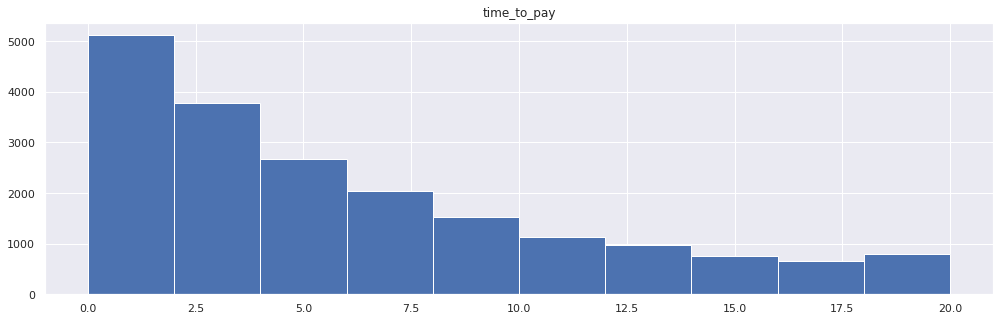

In [16]:
first_purchase[(first_purchase['time_to_pay'] >= time_to_pay_q[0]) & 
               (first_purchase['time_to_pay'] <= time_to_pay_q[1])].hist(
                column='time_to_pay',figsize=(17, 5), range=(0,20))
print(first_purchase['time_to_pay'].mode())
print(first_purchase['time_to_pay'].mean())
print(first_purchase['time_to_pay'].median())

В большинстве своем пользователи тратят ~2.5 минут на оформление покупки.

---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Отличное расследование!

</div>
    
---


<em style="color:#0015f0"> Узнаем, количество покупок за период </em>

Построим для каждой когорты, заодно посмотрим в динамике всего периода

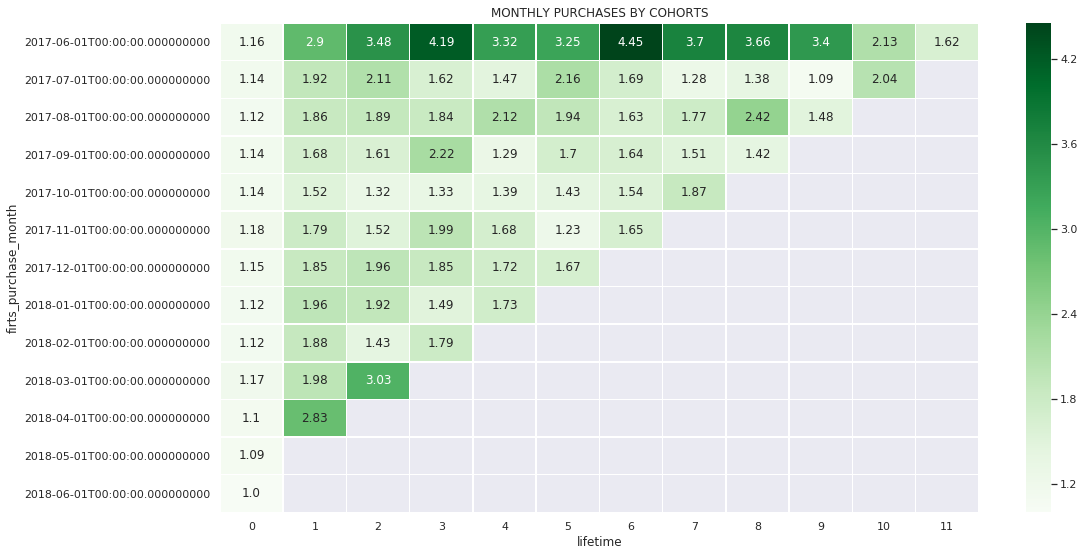

In [17]:
# Собираем данные заново. Объединяем данные о первой покупке с данными о покупках
purchase_data = pd.merge(left=orders, right=first_purchase, left_on='uid', right_on='uid')
purchase_data = purchase_data.drop(columns=['first_session_date_and_time', 'time_to_pay'])

# Выделяем отдельно месяца покупки для построения когортного анализа
purchase_data['firts_purchase_month'] = purchase_data['first_purchase_date_and_time'].astype('datetime64[M]')
purchase_data['purchase_month'] = purchase_data['buy_ts'].astype('datetime64[M]')

# Готовим данные по череде месяцев когорт
purchase_data['lifetime'] = ((purchase_data['purchase_month'] - purchase_data['firts_purchase_month'])
                                /np.timedelta64(1,'M')).round(0).astype('int')

# Группируем необходимые данные для построения сводной таблицы и высчитываем количество покупок на пользователя в когорте
purchase_cohort = purchase_data.groupby(['firts_purchase_month', 'lifetime']).agg({'uid':'nunique', 'buy_ts':'count'})
purchase_cohort['purchases_per_month'] = (purchase_cohort['buy_ts'] / purchase_cohort['uid']).round(2)
purchase_cohort_heatmap = purchase_cohort.pivot_table(index='firts_purchase_month', columns='lifetime', 
                                                      values='purchases_per_month', aggfunc='sum')

# Готовим визуализацию
sns.set(style='darkgrid')
plt.figure(figsize=(17, 9))
plt.title('MONTHLY PURCHASES BY COHORTS')
sns.heatmap(purchase_cohort_heatmap, annot=True, cmap='Greens', fmt='1', linewidths=0.5, linecolor='white');

Снова подтверждается теория, что пользователи когорты "июнь 2017" наиболее активны. Больше всего покупок на пользователя приходится именно из данной группы. Интересным выглядит потенциал группы "март 2018" и "апрель 2018". 

Посчитаем среднее количество покупок на пользователя за весь период:

In [18]:
purchase_cohort_mean = purchase_cohort.groupby(['firts_purchase_month']).agg({'buy_ts':'sum'})
initial_users_count = purchase_data[purchase_data['lifetime'] == 0]
initial_users_count = initial_users_count.groupby('firts_purchase_month').agg({'uid':'count'})

purchase_cohort_mean = purchase_cohort_mean.merge(initial_users_count, on='firts_purchase_month')
purchase_cohort_mean['purchases_mean'] = (purchase_cohort_mean['buy_ts'] / purchase_cohort_mean['uid']).round(2)
print('Среднее количество покупок на пользователя за весь период датасета:{}'.
      format((purchase_cohort_mean.loc[:, 'buy_ts'].sum() / purchase_cohort_mean.loc[:,'uid'].sum()).round(2)))


Среднее количество покупок на пользователя за весь период датасета:1.21


---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Это очень ценный параметр, когорты разные, можно ориентироваться на среднего покупателя

</div>
    
---


<em style="color:#0015f0"> Узнаем, средний чек </em>

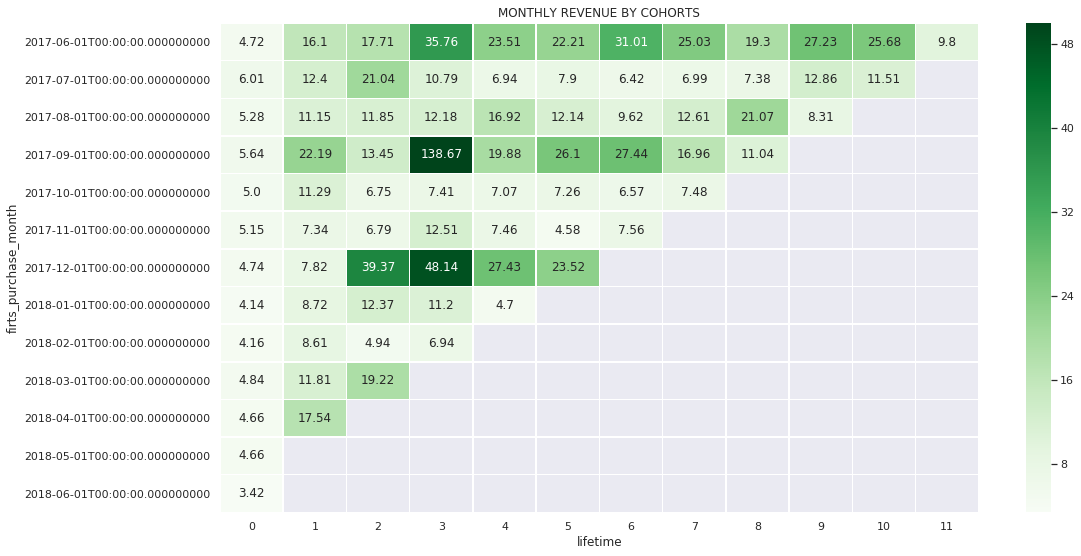

In [19]:
# Группируем необходимые данные для построения сводной таблицы и высчитываем количество покупок на пользователя в когорте
revenue_cohort = purchase_data.groupby(['firts_purchase_month', 'lifetime']).agg({'uid':'nunique', 'revenue':'sum'})
revenue_cohort['revenue_per_month'] = (revenue_cohort['revenue'] / revenue_cohort['uid']).round(2)
revenue_cohort_heatmap = revenue_cohort.pivot_table(index='firts_purchase_month', columns='lifetime', 
                                                     values='revenue_per_month', aggfunc='sum')

# Готовим визуализацию
sns.set(style='darkgrid')
plt.figure(figsize=(17, 9))
plt.title('MONTHLY REVENUE BY COHORTS')
sns.heatmap(revenue_cohort_heatmap, annot=True, vmax='50', cmap='Greens', fmt='1', linewidths=0.5, linecolor='white');

Первая когорта "июнь 2017" (первый теплый летний месяц) остается одной из наиболее активных.
Также стоит отметить когорту "сентябрь 2017" (начало нового сезона) и "декабрь 2017" (новогодние праздники).

Посмотрим на средний чек за все время на пользователя:

In [20]:
revenue_cohort_mean = revenue_cohort.groupby(['firts_purchase_month']).agg({'revenue':'sum'})
revenue_cohort_mean = revenue_cohort_mean.merge(initial_users_count, on='firts_purchase_month')
revenue_cohort_mean['revenue_mean'] = (revenue_cohort_mean['revenue'] / purchase_cohort_mean['uid']).round(2)
print('Средняя выручка на пользователя за весь период датасета:{}'.
      format((revenue_cohort_mean.loc[:, 'revenue'].sum() / revenue_cohort_mean.loc[:,'uid'].sum()).round(2)))

Средняя выручка на пользователя за весь период датасета:6.06


---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Тут есть несколько подходов в расчете этой метрики, в целом все верно получилось. Можно еще считать именно среднюю покупку без лишних агрегаций.
</div>
    
---


<em style="color:#0015f0"> Узнаем, сколько денег приносят пользователи (LTV) </em>

Т.к. в задаче не указана маржинальность услуг / продукции, то позьмем за пример 50%

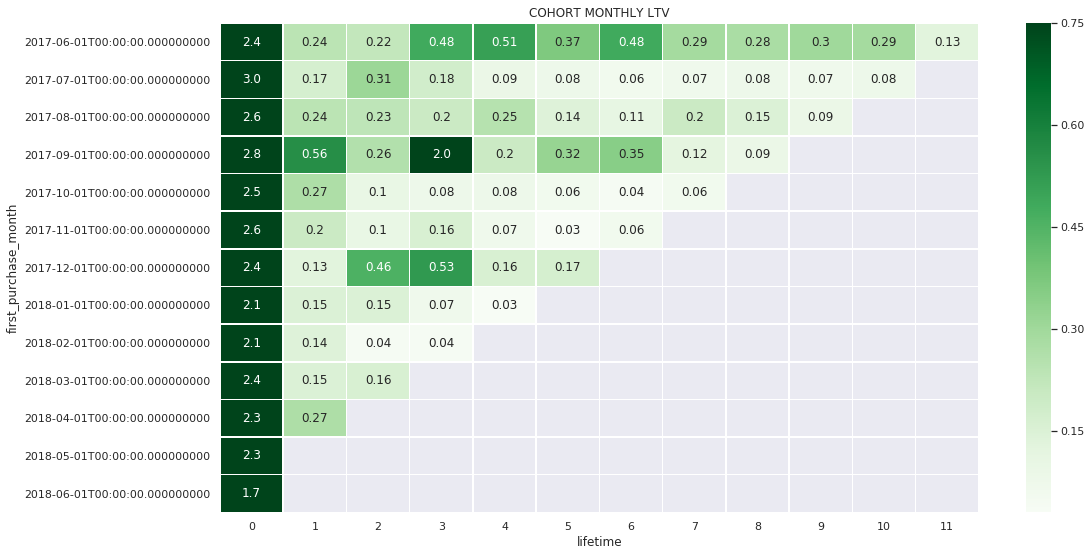

In [21]:
# Формируем датасет
orders['purchase_month'] = orders['buy_ts'].astype('datetime64[M]')

# Узнаем перый месяц покупки
first_orders = orders.groupby('uid').agg({'purchase_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_purchase_month']

# количество уникальных покупателей на каждый месяц
buyers = first_orders.groupby('first_purchase_month').agg({'uid':'nunique'}).reset_index()
buyers.columns = ['first_purchase_month', 'buyers']

# Объединим данные и посчитаем выручку
orders_ltv = pd.merge(orders, first_orders, on='uid')
cohort_ltv = orders_ltv.groupby(['first_purchase_month', 'purchase_month']).agg({'revenue':'sum'}).reset_index()
cohort_ltv = pd.merge(cohort_ltv, buyers, on='first_purchase_month')

# Готовим данные по череде месяцев и считаем валовую прибыль
margin_rate = 0.5
cohort_ltv['gross_profit'] = cohort_ltv['revenue'] * margin_rate
cohort_ltv['lifetime'] = ((cohort_ltv['purchase_month'] - cohort_ltv['first_purchase_month'])/np.timedelta64(1,'M')).round(0).astype('int')

# Считаем LTV по каждой когорте и месяцу жизни
cohort_ltv['ltv'] = cohort_ltv['gross_profit'] / cohort_ltv['buyers']

ltv_pivot = cohort_ltv.pivot_table(index='first_purchase_month', columns='lifetime', values='ltv', aggfunc='sum').round(2)

# Визуализируем данныеsns.set(style='darkgrid')
plt.figure(figsize=(17, 9))
plt.title('COHORT MONTHLY LTV')
sns.heatmap(ltv_pivot, annot=True, vmax='0.75', cmap='Greens', fmt='.2', linewidths=0.5, linecolor='white');

У некоторых групп наблюдается увеличение затрат после падения в первые месяцы "жизни" - июнь 2017, сентябрь 2017 (кратковременный рост), декабрь 2017. В целом наблюдается падение пользователских трат.

Посчитаем по каждой когорте 'LTV' и тотал за весь период по всем пользователям:

In [22]:
ltv_pivot['sum_ltv'] = ltv_pivot[list(ltv_pivot)].sum(axis=1)
print('Итоговый LTV за весь период по всем пользователям: {}'.format(ltv_pivot.loc[:,'sum_ltv'].sum().round(2)))
print('Средний LTV за весь период по всем пользователям: {}'.format(ltv_pivot.loc[:,'sum_ltv'].mean()))
display(ltv_pivot)

Итоговый LTV за весь период по всем пользователям: 45.46
Средний LTV за весь период по всем пользователям: 3.4969230769230766


lifetime,0,1,2,3,4,5,6,7,8,9,10,11,sum_ltv
first_purchase_month,,,,,,,,,,,,,
2017-06-01,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.30,0.29,0.13,5.95
2017-07-01,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,NaN,4.20
2017-08-01,2.64,0.24,0.23,0.20,0.25,0.14,0.11,0.20,0.15,0.09,NaN,NaN,4.25
2017-09-01,2.82,0.56,0.26,1.99,0.20,0.32,0.35,0.12,0.09,NaN,NaN,NaN,6.71
2017-10-01,2.50,0.27,0.10,0.08,0.08,0.06,0.04,0.06,NaN,NaN,NaN,NaN,3.19
2017-11-01,2.58,0.20,0.10,0.16,0.07,0.03,0.06,NaN,NaN,NaN,NaN,NaN,3.20
2017-12-01,2.37,0.13,0.46,0.53,0.16,0.17,NaN,NaN,NaN,NaN,NaN,NaN,3.82
2018-01-01,2.07,0.15,0.15,0.07,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.47
2018-02-01,2.08,0.14,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.30


Наибольшее LTV оказалось в когорте "сентябрь 2017" за счет одного активного декабря (что же им такого предложили?).
Средний LTV по когортам ~3.5 единиц, а тотал за все время по всем пользователям ~45,4.

Данные указаны при условии, что маржинальность 50%

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Здесь, как мне кажется, есть определенная проблема с тем, что когорты прожили не одинаковое количество времени. Лучше выбрать условное "время жизни" когорты, и считать результативность исходя из него -- например, 6 месяцев -- чтобы не слишком много когорт отсечь, потому что они прожили меньше этого времени. И главное смотреть, чтобы когорты прожили это время)
</div>

---


<div style="background-color:#d4d7d9">
    <p> 
        <strong style="color:#0015f0; font-size: 13pt"> Комментарии хозяина тетрадки:</strong>
    </p>
    <p style="background-color:#d4d7d9; color:#0015f0"> Хорошо, интересная идея. Давай уравняем условия и посчитаем LTV с условием жизни в 6 месяцев. Обновление ниже:</p>
</div>

In [23]:
# Создаем фильтим когорт с жизнью >=6 месяцев
ltv_pivot_6 = ltv_pivot.loc[:'2017-11-1', [0,1,2,3,4,5,6]]
ltv_pivot_6['sum_ltv'] = ltv_pivot_6[list(ltv_pivot_6)].sum(axis=1)

display(ltv_pivot_6)
# Итоговый результат LTV на пользователей >=6 месяцев:
print('Итоговый LTV за весь период по пользователям представленных 6 когорт: {}'.format(ltv_pivot_6.loc[:,'sum_ltv'].sum().round(2)))
print('Средний LTV за весь период по пользователям представленных 6 когор: {}'.format(ltv_pivot_6.loc[:,'sum_ltv'].mean().round(1)))
ltv_pivot_6.loc[:,'sum_ltv'].describe()

lifetime,0,1,2,3,4,5,6,sum_ltv
first_purchase_month,,,,,,,,
2017-06-01,2.36,0.24,0.22,0.48,0.51,0.37,0.48,4.66
2017-07-01,3.01,0.17,0.31,0.18,0.09,0.08,0.06,3.90
2017-08-01,2.64,0.24,0.23,0.20,0.25,0.14,0.11,3.81
2017-09-01,2.82,0.56,0.26,1.99,0.20,0.32,0.35,6.50
2017-10-01,2.50,0.27,0.10,0.08,0.08,0.06,0.04,3.13
2017-11-01,2.58,0.20,0.10,0.16,0.07,0.03,0.06,3.20


Итоговый LTV за весь период по пользователям представленных 6 когорт: 25.2
Средний LTV за весь период по пользователям представленных 6 когор: 4.2


count    6.000000
mean     4.200000
std      1.256073
min      3.130000
25%      3.352500
50%      3.855000
75%      4.470000
max      6.500000
Name: sum_ltv, dtype: float64

<div style="background-color:#d4d7d9">
    <p>
        <strong>Вывод:</strong>
    </p>
    <li>Средний LTV по представленным когортам 4.2 ед., медианное в 3.85 ед со стандартным отклонениеем в 1.25</li>
    <li>Есть явный лидер по когортам - "сентябрь 2017", который значительно выше остальных <em>(что отличает данных пользователей? почему именно они и в таком объеме?)</em></li>
    <li>За вычетом анормального сентября, подтвержается теория снижения валовой прибыли с пользователя</li>
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V3

Супер, теперь мы знаем на что можем рассчитывать через пол года

</div>

---

##### Рассмотрим данные, связанные с маркетингом:

<em style="color:#0015f0"> Узнаем, cколько денег потратили всего и по месяца</em>

Затраченная сумма на рекламу за весь период 329131.62
Выручка за весь период 252057.2


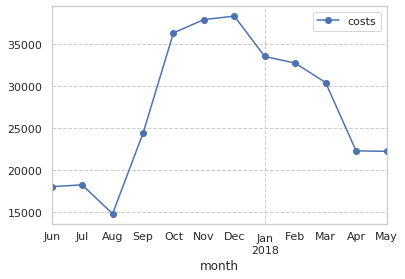

In [24]:
print('Затраченная сумма на рекламу за весь период {}'.format(marketing.loc[:,'costs'].sum()))
marketing['month'] = marketing['dt'].astype('datetime64[M]')
marketing_monthly_data = marketing.groupby('month').agg({'costs':'sum'})

print('Выручка за весь период {}'.format(orders.loc[:,'revenue'].sum().round(2)))

sns.set_style("whitegrid", {'grid.linestyle': '--'})
marketing_monthly_data.plot(marker='o')

На первый взгляд затраты на рекламу превысили выручку от пользователей.

Пик затрат пришелся на Ноябрь - Декабрь. Маркетинговый график повторяет график посещаемости сайта, что дает нам предположение, что львиную долю трафика сайта составляет рекламный трафик, что косвенно видно и по %возврата.

Напомним график распределения трафика по времени:

Text(0.5, 1.0, 'USERS. SOURCE OF TRAFFIC MONTH TO MONTH')

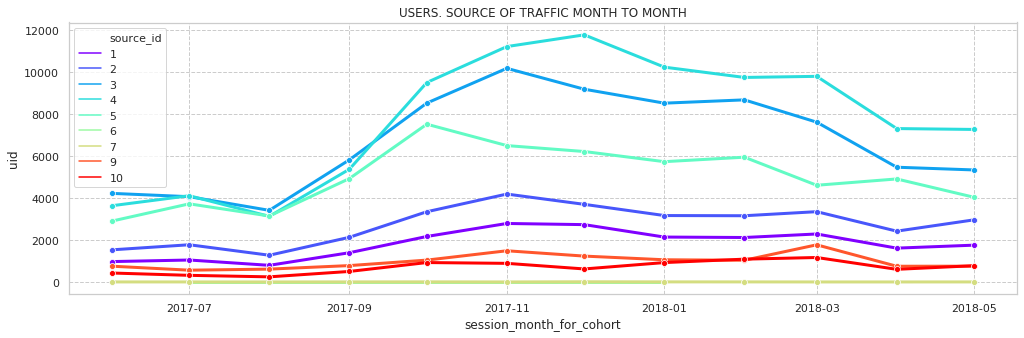

In [25]:
visits['session_month_for_cohort'] = visits['session_date'].astype('datetime64[M]')
traffic_source_time = visits.groupby(['source_id', 'session_month_for_cohort']).agg({'uid':'nunique'}).reset_index()

fig, ax = plt.subplots(figsize=(17,5))
sns.lineplot(x='session_month_for_cohort', y='uid', hue='source_id', legend='full',  marker='o', data=traffic_source_time, palette="rainbow", 
             linewidth=3).set_title('USERS. SOURCE OF TRAFFIC MONTH TO MONTH')

Посмотрим на траты по источника:

In [26]:
marketing_temp = marketing.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
marketing_monthly_data = pd.merge(marketing_monthly_data, marketing_temp, on='month')
marketing_monthly_data.columns = ['month', 'monthly_costs', 'source_id', 'source_monthly_costs']
marketing_source_costs = marketing_monthly_data.groupby('source_id').agg({'source_monthly_costs':'sum'}).sort_values(by='source_monthly_costs', ascending=False)

display(marketing_source_costs)

,source_monthly_costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


Значительно по тратам вырывавается источник №3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd7739c90>],
      dtype=object)

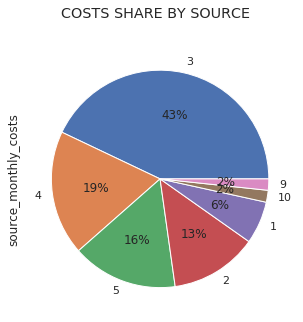

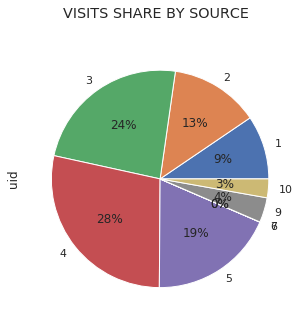

In [27]:
marketing_source_costs.plot.pie(autopct='%1.0f%%', subplots=True, figsize=(5,5), legend=False, title='COSTS SHARE BY SOURCE')

sessions_users_per_day_by_source = visits.groupby(['source_id']).agg({'uid':'count'})
sessions_users_per_day_by_source.plot.pie(y='uid', autopct='%1.0f%%', subplots=True, figsize=(5,5), 
                                   legend=False, title='VISITS SHARE BY SOURCE')

Как видно из графиков,значительно больше потратили на источник №3, при этом доля визитов с нее значительно уступает. Предполагаем, что перед нами инструмент, целью которого не является переход по ссылке. 

Соберем полные данные по источникам в рамках одной таблицы:

,source_id,costs,visits,revenue,customers
0,1,20833.27,34121,40619.71,3831
1,2,42806.04,47626,63180.52,4239
2,3,141321.63,85610,44575.20,9158
3,4,61073.60,101794,50550.26,9894
4,5,51757.10,66905,42665.96,6753
5,9,5517.49,13277,6547.26,1417
6,10,5822.49,10025,3917.07,1230


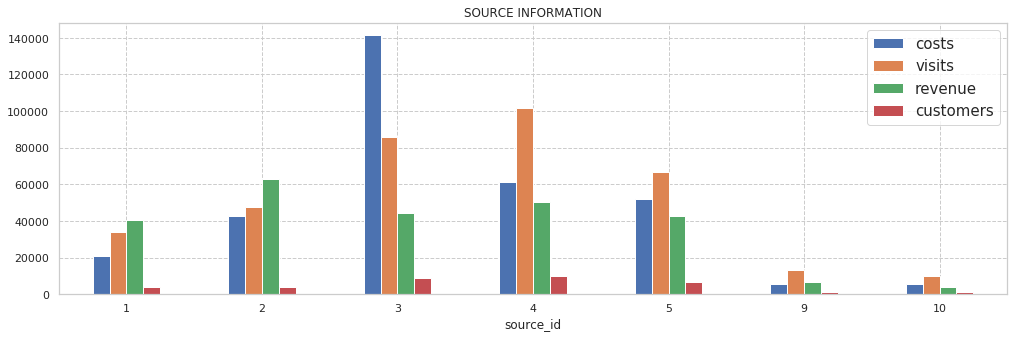

In [28]:
# Данные по затратам в рамках источника
source_data = marketing.groupby('source_id').agg({'costs':'sum'}).reset_index()

# Данные по визитам в рамках источника
visits_temp = visits.groupby('source_id').agg({'uid':'count'}).reset_index()
visits_temp.columns = ['source_id', 'visits']
source_data = pd.merge(source_data, visits_temp, on='source_id')

# Данные по затратам (на основании последнее источника перехода)
visits_temp = visits.groupby('uid').agg({'source_id':'last'}).reset_index()
orders_temp = pd.merge(visits_temp, orders, on='uid')
orders_temp = orders_temp.groupby('source_id').agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_temp.columns = ['source_id', 'revenue', 'customers']
source_data = pd.merge(source_data, orders_temp, on='source_id')
display(source_data)

# Визуализация данных
source_data.plot.bar(x='source_id', figsize=(17,5), width=0.5, title='SOURCE INFORMATION')
plt.xticks(rotation=0)
plt.legend(prop={'size':15})

<strong> Вывод: </strong>
- Самый дорогой источник №3 при достаточно низкой выручке
- Источник №1 обладает лучшим соотношением выручка / затраты, за ним следует источник №2
- Источник №4 имеет самый дешевый клик при затратах примерно сопостовимыми с выручкой
- Наибольшее количество клиентов имеет источник №4

Посчитаем стоимостые / конверсионные метрики:


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Мне очень понравилось как ты выполнид этот блок.
- Верные расчеты
- Наглядная визуализация
- Ты возвращаешься к наблюденям, сделанным ранее и дополняешь свои интересные выводы
</div>

---


<em style="color:#0015f0"> Сколько стоило привлечение одного покупателя из каждого источника и ROMI</em>

In [29]:
source_data['cr, %'] = (source_data['customers'] / source_data['visits'] * 100).round(2)
source_data['cpv'] = (source_data['costs'] / source_data['visits']).round(1)
source_data['cac'] = (source_data['costs'] / source_data['customers']).round(1) # Стоимость привлеченного покупателя из кажлого источника
source_data['ltv'] = ((source_data['revenue'] * margin_rate) / source_data['customers']).round(1)
source_data['romi'] = (source_data['ltv'] / source_data['cac']).round(2)

display(source_data)

,source_id,costs,visits,revenue,customers,"cr, %",cpv,cac,ltv,romi
0,1,20833.27,34121,40619.71,3831,11.23,0.6,5.4,5.3,0.98
1,2,42806.04,47626,63180.52,4239,8.90,0.9,10.1,7.5,0.74
2,3,141321.63,85610,44575.20,9158,10.70,1.7,15.4,2.4,0.16
3,4,61073.60,101794,50550.26,9894,9.72,0.6,6.2,2.6,0.42
4,5,51757.10,66905,42665.96,6753,10.09,0.8,7.7,3.2,0.42
5,9,5517.49,13277,6547.26,1417,10.67,0.4,3.9,2.3,0.59
6,10,5822.49,10025,3917.07,1230,12.27,0.6,4.7,1.6,0.34


<strong> Выводы: </strong>
- Самый дорогой источник по всем показателям - №3
- Самый эффективный источник №1. Почти полностью окупает свои затраты. 
- За ним следует источник №2. несмотря на высокй CAC имеет наилучший LTV

In [30]:
total_ltv = (source_data['revenue'].sum() * margin_rate / source_data['customers'].sum()).round(0)
total_cac = (source_data['costs'].sum() / source_data['customers'].sum()).round(0)

#total_ROMI = ((source_data['revenue'].sum() * margin_rate / source_data['customers'].sum()
#                 - source_data['costs'].sum() / source_data['customers'].sum())).round(0)

print('LTV на текущий момент по всем источникам -', total_ltv)
print('CAC на текущий момент по всем источникам -', total_cac)


LTV на текущий момент по всем источникам - 3.0
CAC на текущий момент по всем источникам - 9.0


При маржинальности 50% окупить текущие маркетинговые затраты не представляется возможным (исключаем чудо и наличие худшей стратегии на рынке). Поэтмоу необходимо поднять маржинальность (75% выглядят также однобокими и почти неосуществимыми), возьмем для примера 100%:

In [31]:
total_ltv_75 = (source_data['revenue'].sum() * 1 / source_data['customers'].sum()).round(0)
total_cac_75 = (source_data['costs'].sum() / source_data['customers'].sum()).round(0)

print('LTV на текущий момент по всем источникам при маржинальности в 100% -', total_ltv_75)
print('CAC на текущий момент по всем источникам при маржинальности в 100% -', total_cac_75)

source_data['ltv'] = ((source_data['revenue'] * 1) / source_data['customers']).round(1)
source_data['romi'] = (source_data['ltv'] / source_data['cac']).round(2)

display(source_data)

LTV на текущий момент по всем источникам при маржинальности в 100% - 7.0
CAC на текущий момент по всем источникам при маржинальности в 100% - 9.0


,source_id,costs,visits,revenue,customers,"cr, %",cpv,cac,ltv,romi
0,1,20833.27,34121,40619.71,3831,11.23,0.6,5.4,10.6,1.96
1,2,42806.04,47626,63180.52,4239,8.90,0.9,10.1,14.9,1.48
2,3,141321.63,85610,44575.20,9158,10.70,1.7,15.4,4.9,0.32
3,4,61073.60,101794,50550.26,9894,9.72,0.6,6.2,5.1,0.82
4,5,51757.10,66905,42665.96,6753,10.09,0.8,7.7,6.3,0.82
5,9,5517.49,13277,6547.26,1417,10.67,0.4,3.9,4.6,1.18
6,10,5822.49,10025,3917.07,1230,12.27,0.6,4.7,3.2,0.68


При условии в 100% маржинальность окупаемость проекта не выглядит сложной задачей при наличии грамотного маркетолога. Перераспределения рекламного сплита, как минимум, позволит выйти даже при текущих настройках / источниках / стратегии на примелимые для компании показатели

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

В целом верный вывод и расчет, но здесь такое же замечание как в предыдущем комментарии по LTV -- необходимо выбрать какое-то время жизни. Это удобно сделать если смотреть ROMI не только по источникам, а по когортам.

</div>

---


### Шаг 3. Общие выводы и рекомендации

<strong> Выводы о текущих показателях на сайте </strong>: 
- На сайте выявлен дотстаточно низкий % возврата пользоваталей и с каждым месяцем количество возвратившихся уменьшается, несмотря на рост среднего времени на сайте на период конца 2017г.
- По сравнению с прошлым годом также прождолжается падение LTV пользователей 
- Пользователи достаточно мало времени проводят на сайте (~2.5 минуты) с учетом контетной наполненности
- Странным выглядит распределение по устройствам со значительным преобладанием десктопа в эпоху мобильного потребления, возможно стоит обратить большее внимание в сторону трендов и позаботиться о мобильной вертске / удобстве пользователей, включая момент корзины / оплаты.
- Существуют когортные группы, которые обладают пиками в определенные месяца  и в целом обладают данными выше, чем у остальных ("июнь 2017", "сентябрь 2017", "декабрь 2017". Возможно стоит обратить внимание на прошлые активности / коммуникационные методы / программы лояльности, которые были использованы и применить успешный опыт вновь

<strong> Выводы о рекламных активностях: </strong>: 
- На текущий момент по затратам на источники имеется серьезный перекос в сторону нерентабельных и невыгодных для компании. Стоит избавиться или доказать эффективность иными методами от источника №3, как самого дорогого по привлечению пользователя. Возможно данный инструмент через post-view влияет на аудиторию и приводит отложенную / ассоциативную конверсию. В первую очередь надо  наращивать использование источника №1, как самого рентабельного и продолжать использование (возможно в меньшем объеме) источника №2. Стоит увеличить вклад в источник №9, дабы протестировать результаты на большем объеме данных.
- Помимо перераспределения бюджетов рекомендовано использовать иные методы, т.е. повысить именно LTV путем проведения А / В тестирования новых креативов / коммуникационных сообщения, пересмотра рекламной стратегии, пересмотра условий размещения
- Рекомендовано также часть бюджета отдавать под новые интсрументы для тестирования дополнительных источников трафика / покапателей.
- Возможно также стоит провести технический аудит сайта и тем самым повысить конверсионность большинства метрик.



<em style="color:#0015f0"> P.S Спасибо за потраченное время :)</m>

---

<div class="alert alert-block alert-warning">
    

### Общий Комментарий от ревьюера

В целом -- отличный отчет! Приятно его читать, все понятно, картинки красивые, выводы верные и полезные. Есть недочет, связанный с подсчетами окупаемости -- из-за того что нужно зафиксировать одинаковое время жизни пользователя. Я думаю, ты его быстро поправишь и жду новой версии)
</div>

---


<div style="background-color:#d4d7d9">
    <p> 
        <strong style="color:#0015f0; font-size: 13pt"> Комментарии хозяина тетрадки:</strong>
    </p>
    <p style="background-color:#d4d7d9; color:#0015f0"> Спасибо за комментарии, Катя. Постараюсь в дальнейших работах учесть. Хорошего дня :)</p>
</div>

---

<div class="alert alert-block alert-success">
    

### Общий Комментарий от ревьюера v3

Отлично, критичных замечаний у меня не осталось -- работа зачтена!)
</div>

---


